<a href="https://colab.research.google.com/github/VivekSaini11/Deep-Learning-Project/blob/master/House_Loan_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import tensorflow as tf
from tensorflow import keras

In [61]:
# Load the dataset that is given to you
data = pd.read_csv('loan_data .csv');
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
data.shape

(192188, 122)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192188 entries, 0 to 192187
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(103), int64(3), object(16)
memory usage: 178.9+ MB


In [24]:
data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [25]:
# Check for null values in the dataset
data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     25914
AMT_REQ_CREDIT_BUREAU_WEEK    25914
AMT_REQ_CREDIT_BUREAU_MON     25914
AMT_REQ_CREDIT_BUREAU_QRT     25914
AMT_REQ_CREDIT_BUREAU_YEAR    25914
Length: 122, dtype: int64

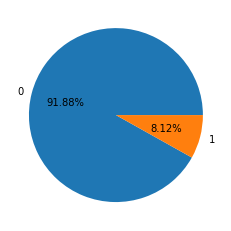

In [26]:
# Print percentage of default to payer of the dataset for the TARGET column
langs = ['0', '1']
plt.pie(data['TARGET'].value_counts(), labels = langs, autopct='%1.2f%%')
plt.show()

No of count for 0's  282686
No of count for 1's  24825


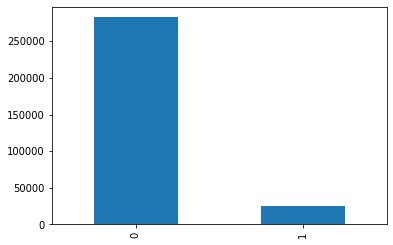

In [62]:
# data is imbalenced
data['TARGET'].value_counts().plot(kind='bar')
count_class_0, count_class_1 = data['TARGET'].value_counts()
print("No of count for 0's ",count_class_0)
print("No of count for 1's ",count_class_1)

1    24825
0    24825
Name: TARGET, dtype: int64


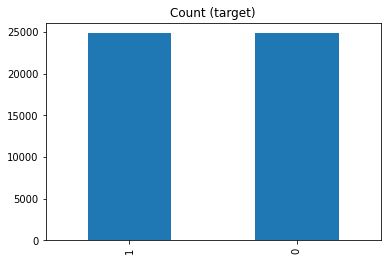

In [63]:
# Balance the dataset if the data is imbalanced
df_class_0 = data[data['TARGET'] == 0]
df_class_1 = data[data['TARGET'] == 1]
df_class_0_under = df_class_0.sample(count_class_1)
data = pd.concat([df_class_0_under, df_class_1], axis=0)
print(data['TARGET'].value_counts())
data['TARGET'].value_counts().plot(kind='bar', title='Count (target)');

In [64]:
# Encode the columns that is required for the model
categorical_feature_mask = data.dtypes == object
categorical_cols = data.columns[categorical_feature_mask].tolist()
data[categorical_cols] = data[categorical_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))
le = LabelEncoder()
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))
data[categorical_cols].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
17842,0,0,0,1,4,7,4,4,1,8,6,42,2,0,5,0
187433,0,0,0,1,6,1,4,3,4,2,0,5,2,0,5,0
241590,0,0,0,1,6,7,2,1,1,14,5,42,2,0,5,0
60615,0,0,1,0,6,7,1,2,1,10,6,5,2,0,4,0
110672,0,0,1,1,6,1,4,2,1,11,1,4,2,0,0,0


In [65]:
# creating a Deep Learning model using keras.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(121,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
	  keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
 ])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 121)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 16)                1952      
_________________________________________________________________
dense_27 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 17        
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


In [66]:
# Calculate Sensitivity as a metrice
X_train, X_test, y_train, y_test = train_test_split(data.drop(['TARGET'], axis = 1) , data.iloc[:, 1], test_size=0.33, random_state=42)
X_train=tf.convert_to_tensor(X_train)
X_test=tf.convert_to_tensor(X_test)
y_train=tf.convert_to_tensor(y_train)
y_test=tf.convert_to_tensor(y_test)
model.fit(X_train,y_train, epochs=10)

Epoch 1/10
1040/1040 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.4995
Epoch 2/10
1040/1040 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.4996
Epoch 3/10
1040/1040 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.4996
Epoch 4/10
1040/1040 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.4996
Epoch 5/10
1040/1040 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.4996
Epoch 6/10
1040/1040 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.4996
Epoch 7/10
1040/1040 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.4996
Epoch 8/10
1040/1040 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.4996
Epoch 9/10
1040/1040 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.4996
Epoch 10/10
1040/1040 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.4996


In [74]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

513/513 [==============================] - 0s 819us/step - loss: nan - accuracy: 0.5009
Test accuracy: 0.5008849501609802


In [79]:
y_pred=model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:457: RuntimeWarning: invalid value encountered in greater
  return (proba > 0.5).astype('int32')


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

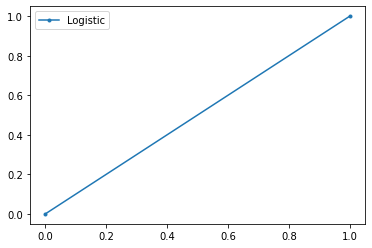

In [84]:
# Calculate area under receiver operating characteristics curve
roc_auc_score(y_test, y_pred)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.legend()
plt.show()